In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wild-blueberry-yield-prediction-challenge/sample_submission.csv
/kaggle/input/wild-blueberry-yield-prediction-challenge/train.csv
/kaggle/input/wild-blueberry-yield-prediction-challenge/test.csv


In [4]:
test_ds=pd.read_csv('/kaggle/input/wild-blueberry-yield-prediction-challenge/test.csv')
test_ds.head()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15000,653.0,25.0,0.50,0.38,0.38,0.63,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.498793,0.447853,35.885121
1,15001,632.0,25.0,0.50,0.25,0.75,0.75,69.7,42.1,58.2,50.2,24.3,41.2,1.0,0.10,0.547744,0.433694,35.923314
2,15002,735.0,25.0,0.50,0.38,0.50,0.50,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.477961,0.436346,34.029223
3,15003,548.0,25.0,0.50,0.25,0.63,0.50,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.428322,0.423927,33.299022
4,15004,165.0,12.5,0.25,0.25,0.38,0.50,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.514303,0.453941,36.682588


# Import Packages

In [5]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

# Read Dataset

In [6]:
dataset=pd.read_csv('/kaggle/input/wild-blueberry-yield-prediction-challenge/train.csv')

## print shape of dataset with rows and columns
print(dataset.shape)

(15000, 19)


In [7]:
## print the top5 records
dataset.head()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,186.0,12.5,0.25,0.25,0.38,0.75,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.542170,0.437266,36.810187,6619.84695
1,1,497.0,25.0,0.50,0.25,0.38,0.63,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.529678,0.459819,36.415657,6771.67497
2,2,518.0,25.0,0.50,0.25,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.417073,0.407126,32.417872,4245.28573
3,3,202.0,12.5,0.25,0.25,0.38,0.75,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.551954,0.476589,38.176597,6503.27204
4,4,455.0,12.5,0.25,0.38,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.564982,0.482227,39.641620,6554.97686


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15000 non-null  int64  
 1   Row#                  15000 non-null  float64
 2   clonesize             15000 non-null  float64
 3   honeybee              15000 non-null  float64
 4   bumbles               15000 non-null  float64
 5   andrena               15000 non-null  float64
 6   osmia                 15000 non-null  float64
 7   MaxOfUpperTRange      15000 non-null  float64
 8   MinOfUpperTRange      15000 non-null  float64
 9   AverageOfUpperTRange  15000 non-null  float64
 10  MaxOfLowerTRange      15000 non-null  float64
 11  MinOfLowerTRange      15000 non-null  float64
 12  AverageOfLowerTRange  15000 non-null  float64
 13  RainingDays           15000 non-null  float64
 14  AverageRainingDays    15000 non-null  float64
 15  fruitset           

In [9]:
# Verifying data types and integrity
print("\nData Types:")
print(dataset.dtypes)

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(dataset.describe())


Data Types:
id                        int64
Row#                    float64
clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
MaxOfUpperTRange        float64
MinOfUpperTRange        float64
AverageOfUpperTRange    float64
MaxOfLowerTRange        float64
MinOfLowerTRange        float64
AverageOfLowerTRange    float64
RainingDays             float64
AverageRainingDays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
yield                   float64
dtype: object

Descriptive Statistics:
                 id          Row#     clonesize      honeybee       bumbles  \
count  15000.000000  1.500000e+04  15000.000000  15000.000000  15000.000000   
mean    7499.500000  4.090499e+03     19.792733      0.387576      0.284637   
std     4330.271354  4.485426e+05      6.651683      0.364954      0.059047   
min        0.000000  0.0

In [11]:
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#dataset['Recurred']=le.fit_transform(dataset['Recurred'])
#Recurred_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
#Recurred_name_mapping

In [12]:
#pd.DataFrame(Recurred_name_mapping.items())

In [13]:
dataset.head()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,186.0,12.5,0.25,0.25,0.38,0.75,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.542170,0.437266,36.810187,6619.84695
1,1,497.0,25.0,0.50,0.25,0.38,0.63,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.529678,0.459819,36.415657,6771.67497
2,2,518.0,25.0,0.50,0.25,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.417073,0.407126,32.417872,4245.28573
3,3,202.0,12.5,0.25,0.25,0.38,0.75,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.551954,0.476589,38.176597,6503.27204
4,4,455.0,12.5,0.25,0.38,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.564982,0.482227,39.641620,6554.97686


# EDA
## Missing features

In [14]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

No Missing Feature

## Numerical Variables

In [15]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  19


,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,186.0,12.5,0.25,0.25,0.38,0.75,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.542170,0.437266,36.810187,6619.84695
1,1,497.0,25.0,0.50,0.25,0.38,0.63,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.529678,0.459819,36.415657,6771.67497
2,2,518.0,25.0,0.50,0.25,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.417073,0.407126,32.417872,4245.28573
3,3,202.0,12.5,0.25,0.25,0.38,0.75,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.551954,0.476589,38.176597,6503.27204
4,4,455.0,12.5,0.25,0.38,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.564982,0.482227,39.641620,6554.97686


In [16]:
dataset.describe()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,4.090499e+03,19.792733,0.387576,0.284637,0.486636,0.590068,82.122847,49.643807,68.615587,59.195087,28.643620,48.541213,18.622264,0.324273,0.500061,0.445533,36.068112,6008.667461
std,4330.271354,4.485426e+05,6.651683,0.364954,0.059047,0.148620,0.147335,9.144463,5.548170,7.639551,6.609386,3.194213,5.391038,11.772842,0.165186,0.077063,0.037828,4.098125,1352.477016
min,0.000000,0.000000e+00,12.500000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.246568,22.079199,1637.704020
25%,3749.750000,2.490000e+02,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.450822,0.418220,33.239806,5124.854900
50%,7499.500000,4.680000e+02,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.505280,0.446451,36.018624,6107.382470
75%,11249.250000,5.980000e+02,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.559628,0.471650,38.945152,7013.002810
max,14999.000000,5.493544e+07,37.500000,18.430000,0.585000,0.750000,0.750000,94.600000,72.900000,79.000000,71.900000,33.000000,62.000000,34.000000,0.560000,0.833158,0.812803,46.585105,8969.401840


## Temporal Variables(Eg: Datetime Variables)

In [17]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

[]

## Numerical variables are usually of 2 type
## 1. Discrete Features and Continous Features

In [18]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 13


In [19]:
discrete_feature

['clonesize',
 'honeybee',
 'bumbles',
 'andrena',
 'osmia',
 'MaxOfUpperTRange',
 'MinOfUpperTRange',
 'AverageOfUpperTRange',
 'MaxOfLowerTRange',
 'MinOfLowerTRange',
 'AverageOfLowerTRange',
 'RainingDays',
 'AverageRainingDays']

In [20]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 6


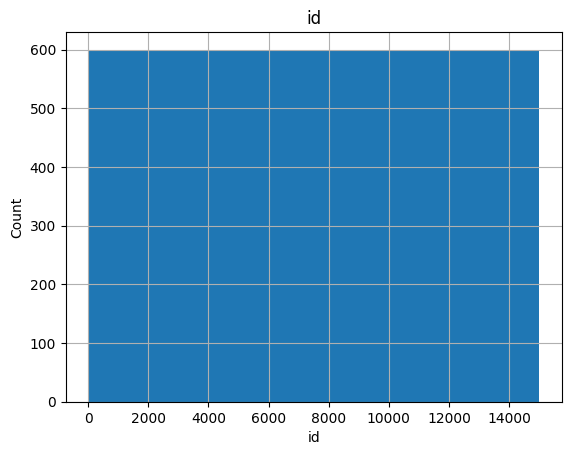

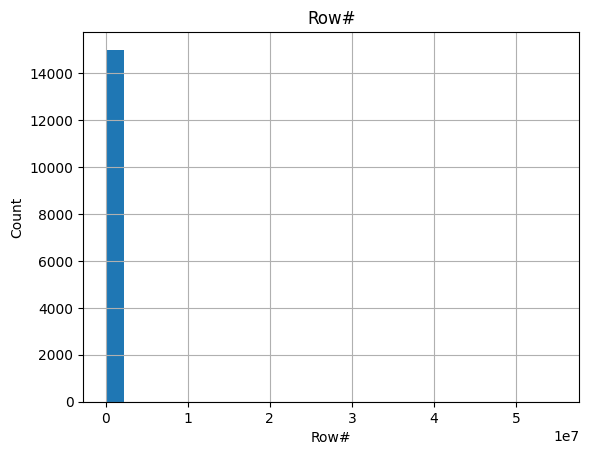

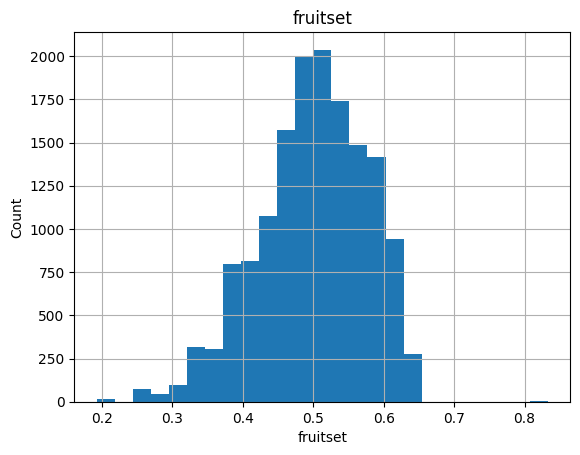

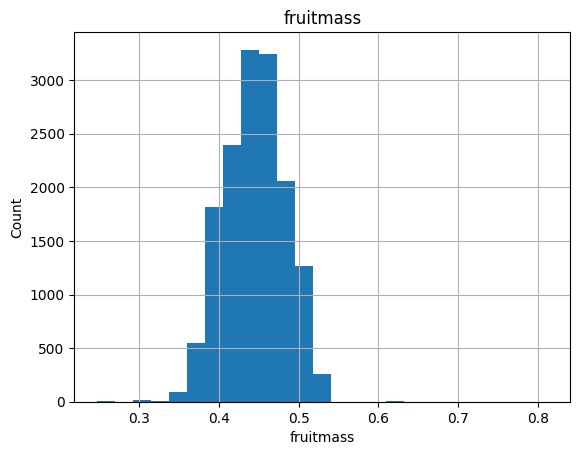

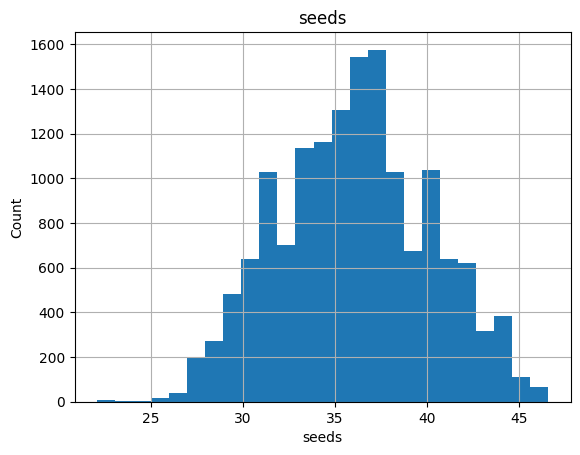

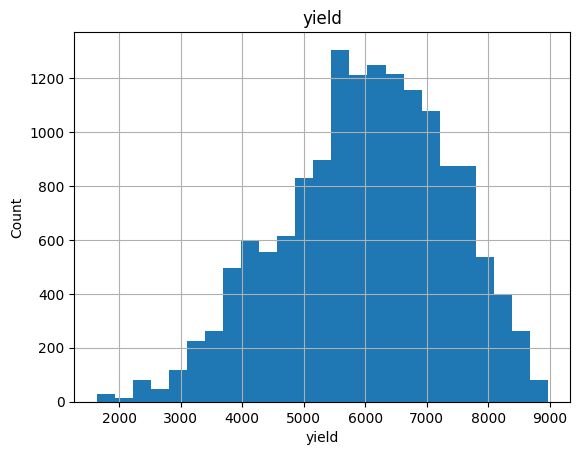

In [21]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Outliers In Numerical Feature

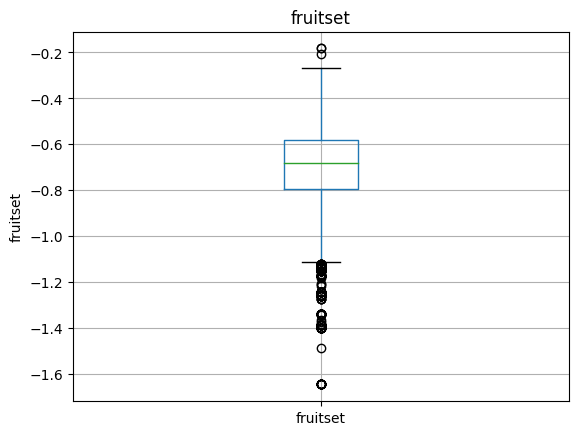

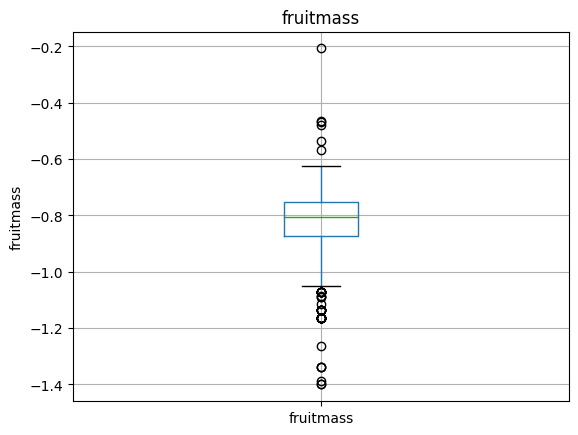

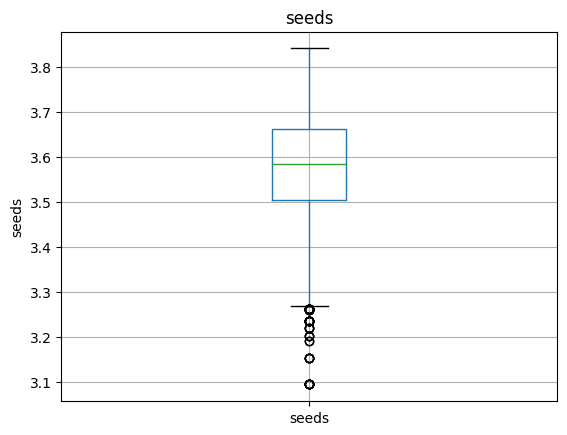

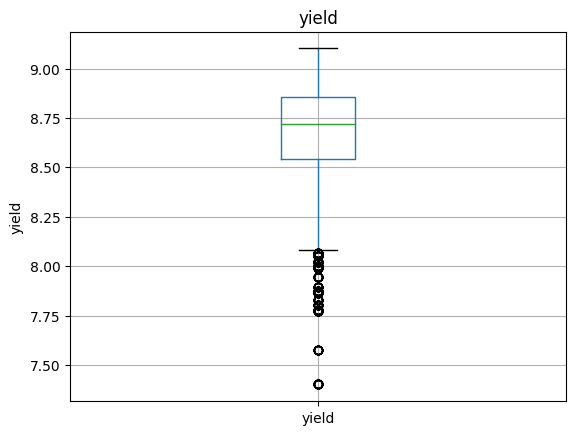

In [25]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

## Categorical Features

In [22]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

[]

In [23]:
dataset[categorical_features].head()

""
0
1
2
3
4


In [28]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

In [24]:
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['Recurred'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Recurred')
    plt.title(feature)
    plt.show()

In [25]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# dataset['NObeyesdad']=le.fit_transform(dataset['NObeyesdad'])
# le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
# le_name_mapping

In [26]:

le_cat_name=dict()
cat_le = preprocessing.LabelEncoder()
for i in categorical_features:
    dataset[i]=cat_le.fit_transform(dataset[i])
    le_cat_name[i] = dict(zip(cat_le.classes_, cat_le.transform(cat_le.classes_)))

In [27]:
pd.DataFrame(le_cat_name.items())

""


In [28]:
dataset.head()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,186.0,12.5,0.25,0.25,0.38,0.75,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.542170,0.437266,36.810187,6619.84695
1,1,497.0,25.0,0.50,0.25,0.38,0.63,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.529678,0.459819,36.415657,6771.67497
2,2,518.0,25.0,0.50,0.25,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.417073,0.407126,32.417872,4245.28573
3,3,202.0,12.5,0.25,0.25,0.38,0.75,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.551954,0.476589,38.176597,6503.27204
4,4,455.0,12.5,0.25,0.38,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.564982,0.482227,39.641620,6554.97686


# Feature Slection

In [29]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [30]:
## Capture the dependent feature
X=dataset.drop(['id','yield'],axis=1)
y=dataset[['yield']]

In [31]:
X.shape,y.shape

((15000, 17), (15000, 1))

In [32]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X, y)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.262e+09, tolerance: 2.744e+06
  model = cd_fast.enet_coordinate_descent(


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [33]:
feature_sel_model.get_support()

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [34]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 17
selected features: 16
features with coefficients shrank to zero: 0


In [35]:
selected_feat

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds'],
      dtype='object')

In [38]:
X=X[selected_feat]

In [39]:
X.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,12.5,0.25,0.25,0.38,0.75,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.542170,0.437266,36.810187
1,25.0,0.50,0.25,0.38,0.63,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.529678,0.459819,36.415657
2,25.0,0.50,0.25,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.417073,0.407126,32.417872
3,12.5,0.25,0.25,0.38,0.75,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.551954,0.476589,38.176597
4,12.5,0.25,0.38,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.564982,0.482227,39.641620


<Axes: >

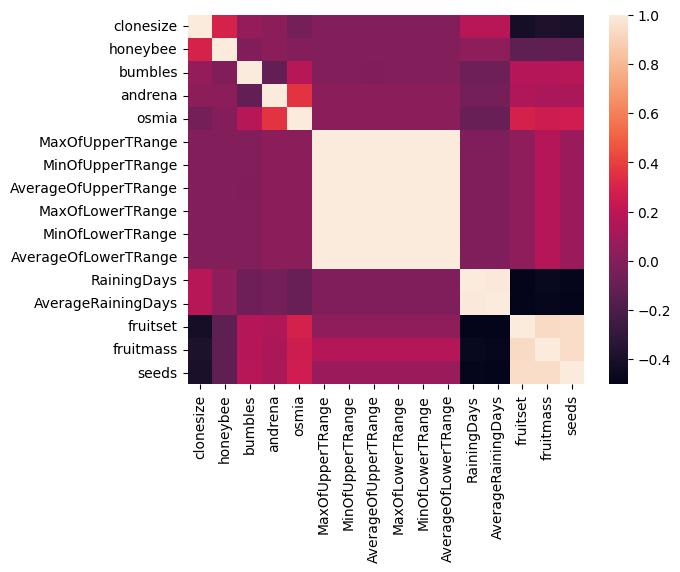

In [40]:
sns.heatmap(X.corr())

In [41]:
X.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,12.5,0.25,0.25,0.38,0.75,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.542170,0.437266,36.810187
1,25.0,0.50,0.25,0.38,0.63,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.529678,0.459819,36.415657
2,25.0,0.50,0.25,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.417073,0.407126,32.417872
3,12.5,0.25,0.25,0.38,0.75,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.551954,0.476589,38.176597
4,12.5,0.25,0.38,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.564982,0.482227,39.641620


# Model Building

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [45]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators = 100) 
clf.fit(X_train, y_train)

/tmp/ipykernel_30/2587191549.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestRegressor()

In [46]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

In [51]:
# using metrics module for accuracy calculation
from sklearn import metrics 
print("ACCURACY OF THE MODEL:", metrics.r2_score(y_test, y_pred))

ACCURACY OF THE MODEL: 0.9153071617270656


In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import (accuracy_score,classification_report,confusion_matrix,
                             precision_score,recall_score,f1_score,roc_auc_score,mean_squared_error,mean_absolute_error,r2_score)

In [4]:
models={
    "Decison Tree":DecisionTreeRegressor(),
    "Random Forest":RandomForestRegressor(),
    "XGBoost":XGBRegressor(objective="binary:logistic", random_state=42),
    "GradientBoost":GradientBoostingRegressor(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0),
    "AdaBoost":AdaBoostRegressor(n_estimators=100, random_state=0),
    "CatBoost":CatBoostRegressor(learning_rate= 0.1, depth=6, l2_leaf_reg= 3, iterations= 100)
    
}

In [5]:
!pip install dagshub
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.0/251.0 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 36.4 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: dacite
    Found existing installation: dacite 1.8.1
    Uninstalling dacite-1.8.1:
      Successfully uninstalled dacite-1.8.1
  Attempting uninstall: requests-toolbelt
    Found existing installation: requests-toolbelt 0.10.1
    Uninstalling requests-toolbelt-0.10.1:
      Successfully uninstalled requests-toolbelt-0.10.1
  Attempting uninstall: botocore
    Found existing installation: botocore 1.35.23
    Uninstalling botocore-1.35.23:
      Successfully uninstalled botocore-1.35.23
ERROR: pip's dependency resolver does not currently take into account all th

In [45]:
import dagshub
dagshub.init(repo_owner='SunilKumar-ugra', repo_name='Wild-blueberry-yeild-prediction', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()





Open the following link in your browser to authorize the client:

https://dagshub.com/login/oauth/authorize?state=6fce6515-2e9b-4b40-a117-17d6b54f3881&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=a07a947fc3645e3aaea840a941b3ce10be72c3dda69f2b6e61599be1f24359bd






Initialized MLflow to track repo "SunilKumar-ugra/Thyroid-Cancer-Recurrence-Prediction"

Repository SunilKumar-ugra/Thyroid-Cancer-Recurrence-Prediction initialized!

In [46]:
import mlflow
mlflow.set_tracking_uri("https://dagshub.com/SunilKumar-ugra/Wild-blueberry-yeild-prediction.mlflow")
mlflow.set_experiment("Wild Blueberry Yeild Prediction")

<Experiment: artifact_location='mlflow-artifacts:/16c9651c12c140aa9dc9d4eace94e477', creation_time=1716650019448, experiment_id='0', last_update_time=1716650019448, lifecycle_stage='active', name='Thyroid Cancer Recurrence Prediction', tags={'mlflow.sharedViewState.f929573f3bf33869cb47d74c838afd8d0ff0e29f39611ab32491f4fe705ed4ca': '{"searchFilter":"","orderByKey":"metrics.`Test '
                                                                                            'Accuracy`","orderByAsc":false,"startTime":"ALL","lifecycleFilter":"Active","datasetsFilter":[],"modelVersionFilter":"All '
                                                                                            'Runs","selectedColumns":["attributes.`Source`","attributes.`Models`","metrics.`Train '
                                                                                            'Accuracy`","metrics.`Test '
                                                                                            'Accurac

In [6]:
def regression_eval_metrics(actual, pred):
        mse=mean_squared_error(actual, pred)
        rmse = np.sqrt(mean_squared_error(actual, pred))
        mae = mean_absolute_error(actual, pred)
        r2 = r2_score(actual, pred)
        return rmse, mae, r2, mse

In [48]:
mlflow.sklearn.autolog(disable=True)

for i in range(len(list(models))):
    model=list(models.values())[i]
    model_name=list(models.keys())[i]
    
    with mlflow.start_run(run_name=str(model_name)):
        mlflow.set_tag("model_name", str(model_name))
        
        model.fit(X_train,y_train)
    
        y_train_pred=model.predict(X_train)
        y_test_pred=model.predict(X_test)
        
        
        #training   performance
        (trn_rmse, trn_mae, trn_r2,trn_mse) = regression_eval_metrics(y_train,y_train_pred)
        
        #testing   performance
        (tst_rmse, tst_mae, tst_r2,tst_mse) = regression_eval_metrics(y_test,y_test_pred)
        
        #train performance log
        mlflow.log_metric("Train Root Mean Square Error", trn_rmse)
        mlflow.log_metric("Train Mean Absolute Error", trn_mae)
        mlflow.log_metric("Train R-Square", trn_r2)
        mlflow.log_metric("Train Mean Square Error", trn_mse)
        
        # test performance log
        mlflow.log_metric("Test Root Mean Square Error", tst_rmse)
        mlflow.log_metric("Test Mean Absolute Error", tst_mae)
        mlflow.log_metric("Test R-Square", tst_r2)
        mlflow.log_metric("Test Mean Square Error", tst_mse)
        
        #Model log
        mlflow.sklearn.log_model(model, str(model_name)+"_model")

/tmp/ipykernel_18/3687507582.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

  model.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.

  warnings.warn("Setuptools is replacing distutils.")

/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported be

0:	learn: 0.6292586	total: 52.4ms	remaining: 5.19s

1:	learn: 0.5803514	total: 53ms	remaining: 2.6s

2:	learn: 0.5421869	total: 53.3ms	remaining: 1.72s

3:	learn: 0.5036847	total: 53.7ms	remaining: 1.29s

4:	learn: 0.4686956	total: 54ms	remaining: 1.03s

5:	learn: 0.4318224	total: 54.3ms	remaining: 850ms

6:	learn: 0.4059669	total: 54.6ms	remaining: 726ms

7:	learn: 0.3778390	total: 55ms	remaining: 633ms

8:	learn: 0.3547060	total: 55.4ms	remaining: 560ms

9:	learn: 0.3346368	total: 55.7ms	remaining: 501ms

10:	learn: 0.3179591	total: 56ms	remaining: 453ms

11:	learn: 0.2969079	total: 56.2ms	remaining: 412ms

12:	learn: 0.2829121	total: 56.6ms	remaining: 379ms

13:	learn: 0.2730625	total: 56.9ms	remaining: 350ms

14:	learn: 0.2629350	total: 57.3ms	remaining: 325ms

15:	learn: 0.2514453	total: 57.6ms	remaining: 302ms

16:	learn: 0.2404014	total: 57.9ms	remaining: 283ms

17:	learn: 0.2331382	total: 58.3ms	remaining: 265ms

18:	learn: 0.2236564	total: 58.6ms	remaining: 250ms

19:	learn: 0

/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.

  warnings.warn(

/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.

  warnings.warn("Setuptools is replacing distutils.")


# Result

[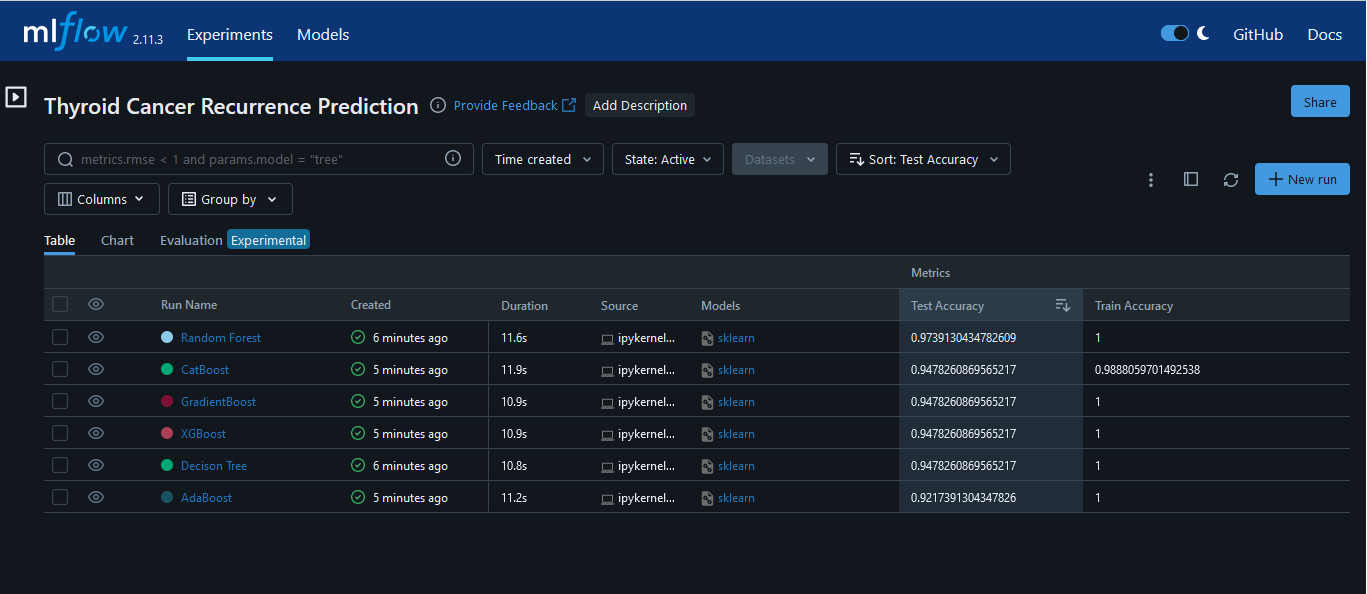](https://dagshub.com/SunilKumar-ugra/Thyroid-Cancer-Recurrence-Prediction.mlflow/#/experiments/0?viewStateShareKey=f929573f3bf33869cb47d74c838afd8d0ff0e29f39611ab32491f4fe705ed4ca)